In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace
import math

# Assignment 2

## Task 2.1

First I do the same as in assignment 1: defines a arbitrary polynomial model. 




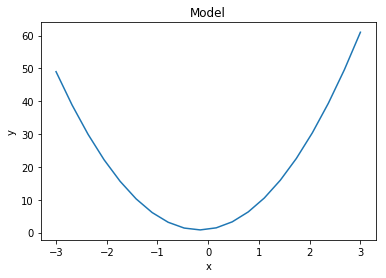

In [2]:
def arbitrary_poly(params):
    poly_model = lambda x: sum([p*(x**i) for i, p in enumerate(params)])
    return poly_model

# params: [theta_0, theta_1, ... , theta_n], where n = model order and theta_0 is bias 
true_params = [1,2,6]
y_model = arbitrary_poly(true_params)

# Plot true model
x = np.linspace(start=-3, stop=3, num=20)
plt.figure()
plt.plot(x, y_model(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model");

### Then I generate the noise measurements with gaussian distribution:

201


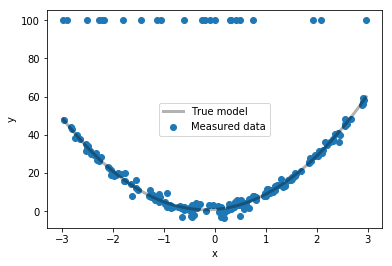

In [3]:
# Hyperparameters for the type of noise-generating distribution.
loc = 0           # location (mean) parameter 
scale = 1         # scaling (std dev) parameter
magnitude = 1.2   # noise magnitude
N = 201          # number of samples

np.random.seed(123)  # Non-random generation between code executions. Comment out for true random

# Generate data points
range_low = -3
range_high = 3
u = np.sort(np.random.uniform(range_low,range_high,N))
y_true = y_model(u)


# Generate noisez

pdf = laplace.pdf

normVariance = 1 # Input as the scale parameter in the normal distribution

laplaceVariance = 1

alfa = 0

gamma = 0.1

noiseNorm = magnitude * np.random.normal(loc, normVariance, int(alfa * N))

noiseLaplace = magnitude * np.random.laplace(loc, laplaceVariance, int((1-alfa)*N))

faultyMeasurement = np.full(int(N*gamma), 100) 

#NoiseFault = np.concatenate((noiseLaplace, faultyMeasurement))

#np.random.shuffle(NoiseFault)
#print(NoiseFault[:10])

# Add noise to the generated data points - thus simulating measurement
print(len(noiseLaplace))
y = y_true

for i in range(0, N):
    faulty = np.random.binomial(1, gamma)
    if faulty:
        y[i] = 100
    else:
        y[i] = y_true[i] + noiseLaplace[i]

# Plot measured data
plt.scatter(u, y, label=r"Measured data")
u0 = np.linspace(min(u), max(u), N)
plt.plot(u0, y_model(u0), "k", alpha=0.3, lw=3, label="True model")
plt.legend()
plt.xlabel("x")
plt.ylabel("y");

## Task 2.3

### LS:



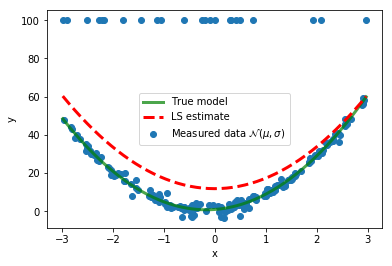

In [4]:
y=y_true
# Matrix form
u_tensor_0 = np.reshape(u,(N,1))
#print(u_tensor_0)
ones_vec = np.ones((N,1))

u_tensor = ones_vec
#print(ones_vec)

#print(u_tensor)

for i in range(1,len(true_params)):
    u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)
#print(u_tensor1)

#-------------
u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)  # calculating dot product
u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u) #calculating inverse

u_transpose_dot_y = np.dot(u_tensor.T,y)  # calculating dot product


LS_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y)
LS_params_rounded = ["{:.2f}".format(round(i, 2)) for i in LS_params.tolist()]
#print(f"LS parameters:         {LS_params_rounded}")
#print(f"True model parameters: {true_params}")

diffParams = []
for i in range(0, len(true_params)):
    diffParams.append(float(true_params[i] - float(LS_params_rounded[i])))

#print("The differnence between the estimated theata and the real Theta is: " )
#print(diffParams)

# Recreate model based on LS estimate:
LS_params = LS_params.tolist()
LS_estimate = arbitrary_poly(LS_params)

# Plot true vs. estimated model
plt.scatter(u, y, label=r"Measured data $\mathcal{N}(\mu, \sigma)$")
u0 = np.linspace(min(u), max(u), N)
plt.plot(u0, y_model(u0), "g", alpha=0.7, lw=3, label="True model")
plt.plot(u0, LS_estimate(u0), "r--",  lw=3, label="LS estimate")
#plt.xlim(0, 10)
plt.legend()
plt.xlabel("x")
plt.ylabel("y");

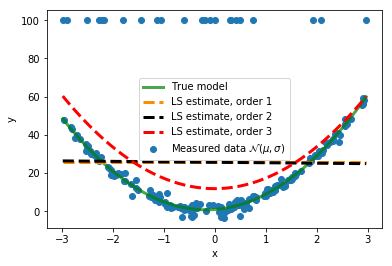

In [5]:
y=y_true
# Matrix form
def LSorderFunc(order, u, y, N):
    u_tensor_0 = np.reshape(u,(N,1))
    #print(u_tensor_0)
    ones_vec = np.ones((N,1))

    u_tensor = ones_vec
    #print(ones_vec)

    #print(u_tensor)

    for i in range(1,order):
        u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)
    #print(u_tensor1)

    #-------------
    u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)  # calculating dot product
    u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u) #calculating inverse

    u_transpose_dot_y = np.dot(u_tensor.T,y)  # calculating dot product


    LS_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y)
    LS_params_rounded = ["{:.2f}".format(round(i, 2)) for i in LS_params.tolist()]
    #print(f"LS parameters:         {LS_params_rounded}")
   # print(f"True model parameters: {true_params}")

    diffParams = []
    for i in range(0, order):
        diffParams.append(float(true_params[i] - float(LS_params_rounded[i])))

    #print("The differnence between the estimated theata and the real Theta is: " )
    #print(diffParams)

    # Recreate model based on LS estimate:
    LS_params = LS_params.tolist()
    LS_estimate = arbitrary_poly(LS_params)
    return LS_params, LS_estimate
LS_params_1, LS_estimate_1 = LSorderFunc(1, u, y, N)
LS_params_2, LS_estimate_2 = LSorderFunc(2, u, y, N)
LS_params_3, LS_estimate_3 = LSorderFunc(3, u, y, N)
#print(LS_params_1, LS_params_2, LS_params_3)
# Plot true vs. estimated model

plt.scatter(u, y,  label=r"Measured data $\mathcal{N}(\mu, \sigma)$")
u0 = np.linspace(min(u), max(u), N)
plt.plot(u0, y_model(u0), "g", alpha=0.7, lw=3, label="True model")
plt.plot(u0, LS_estimate_1(u0), color="darkorange" ,linestyle="--",  lw=3, label="LS estimate, order 1")
plt.plot(u0, LS_estimate_2(u0), color="black" ,linestyle="--",  lw=3, label="LS estimate, order 2")

plt.plot(u0, LS_estimate_3(u0), "r--",  lw=3, label="LS estimate, order 3")
#plt.xlim(0, 10)
plt.legend()
plt.xlabel("x")
plt.ylabel("y");

## ML:


### Function for calculating the log likelihood function: 

In [6]:
y=y_true
def log_lik(par_vec, y, x):
      # Use the distribution class chosen earlier
    # If the standard deviation parameter is negative, return a large value:
    if par_vec[-1] < 0:
        return(1e8)
    # The likelihood function values:
    lik = pdf(y,
              loc = sum([p*(x**i) for i, p in enumerate(par_vec[:-1])]),
              scale = par_vec[-1])
    
    #This is similar to calculating the likelihood for Y - XB
    # res = y - par_vec[0] - par_vec[1] * x
    # lik = norm.pdf(res, loc = 0, sd = par_vec[2])
    
    # If all logarithms are zero, return a large value
    if all(v == 0 for v in lik):
        return(1e8)
    # Logarithm of zero = -Inf
    return(-sum(np.log(lik[np.nonzero(lik)])))

### Function for calculating the MLE:

In [7]:
y=y_true
pdf = laplace.pdf
def MLEfunction(order,u, y, N):

    import scipy.optimize as optimize

    # The likelihood function includes the scale (std dev) parameter which is also estimated by the optimized
    # therefore the initial guess verctor has length n+2 [theta_0_hat, theta_1_hat, ... , theta_n_hat, sigma_hat]
    init_guess = np.zeros(order+1)
    init_guess[-1] = N

    # Do Maximum Likelihood Estimation:
    opt_res = optimize.minimize(fun = log_lik,
                                x0 = init_guess,
                                options={'disp': False},
                                args = (y, u))

    MLE_params = opt_res.x[:-1]
    MLE_estimate = arbitrary_poly(MLE_params)

    MLE_params_rounded = ["{:.2f}".format(round(i, 2)) for i in MLE_params.tolist()]
    #print(f"\nMLE parameters of order :      {MLE_params_rounded}")

    return MLE_params, MLE_estimate

    

### Calculating ML for differnt orders:


True model parameters: [1, 2, 6]


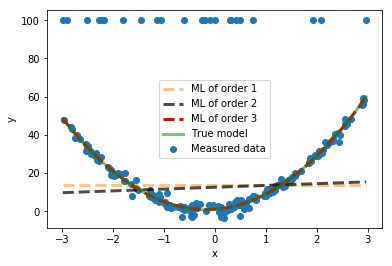

In [8]:
y = y_true
params1,estimate1 = MLEfunction(1, u, y, N)
params2, estimate2 = MLEfunction(2, u, y, N)
params3, estimate3 = MLEfunction(3, u, y, N)

print(f"\nTrue model parameters: {true_params}")

# Plot measured data
plt.scatter(u, y, label=r"Measured data")
u0 = np.linspace(min(u), max(u), N)
plt.plot(u0, estimate1(u0), linestyle='--', color='darkorange', alpha=0.5, lw=3, label="ML of order 1")
plt.plot(u0, estimate2(u0), linestyle='--', color='black', alpha=0.7, lw=3, label="ML of order 2")
plt.plot(u0, estimate3(u0), linestyle='--', color='red', alpha=1, lw=3, label="ML of order 3")
plt.plot(u0, y_model(u0), 'g', alpha = 0.5, lw = 3, label="True model")
plt.legend()
plt.xlabel("x")

plt.ylabel("y");

Best LS model: 3
Best ML model: 3

LS_model_3_dev_test: 860.3564044742878
ML_model_3_dev_test: 701.2416926058229


Text(0, 0.5, 'y')

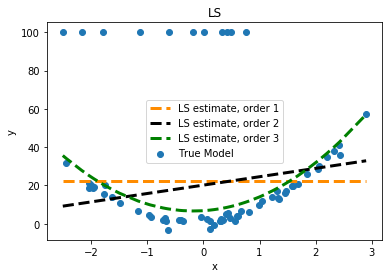

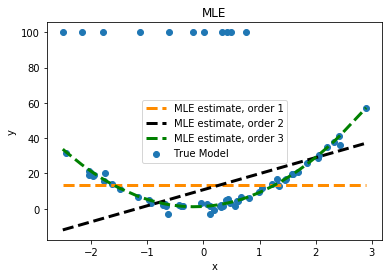

In [9]:
y=y_true
def getModels(order, u, y):
    LS_params = []
    LS_estimates =[]
    MLE_params = []
    MLE_estimates = []
    N = len(u)
    for i in range(order):
        tempPar, tempEst = LSorderFunc(i+1, u, y, N)
        LS_params.append(tempPar)
        LS_estimates.append(tempEst)
        tempPar, tempEst = MLEfunction(i+1,u, y, N)
        MLE_params.append(tempPar)
        MLE_estimates.append(tempEst)
    return LS_params, LS_estimates, MLE_params, MLE_estimates


def createNewSets(u,y):
    NoiseXY = np.array([u,y]).T
    np.random.shuffle(NoiseXY)


    training_set = NoiseXY[::3]
    training_set = training_set[training_set[:,0].argsort()].T

    test_set =NoiseXY[1::3]

    test_set = test_set[test_set[:,0].argsort()].T

    validation_set = NoiseXY[2::3]
    validation_set = validation_set[validation_set[:,0].argsort()].T

    true_training = y_model(training_set[0])
    true_test = y_model(test_set[0])
    true_validation = y_model(validation_set[0])
    return training_set, test_set, validation_set
training_set, test_set, validation_set = createNewSets(u,y)

true_training = y_model(training_set[0])
true_test = y_model(test_set[0])
true_validation = y_model(validation_set[0])
def singlePerf(y_t, y_hat):
    return  sum(abs(y_t - y_hat))

def modelSelect(performance):
    return performance.index(min(performance))

def modelsPerf(order, LS_estimates, MLE_estimates, validation_set, test_set):
    LS_valid_dev = []
    MLE_valid_dev = []
    
    for i in range(order):
        tmpLS = singlePerf(validation_set[1], LS_estimates[i](validation_set[0]))
        LS_valid_dev.append(tmpLS)
        tmpMLE = singlePerf(validation_set[1], MLE_estimates[i](validation_set[0]))
        MLE_valid_dev.append(tmpMLE)
        
    LS_opt_ind = modelSelect(LS_valid_dev)
    LS_opt_model = LS_estimates[LS_opt_ind]
    
    MLE_opt_ind = modelSelect(MLE_valid_dev)
    MLE_opt_model = MLE_estimates[MLE_opt_ind]
    #test
    print(f"Best LS model: {LS_opt_ind+1}")
    print(f"Best ML model: {MLE_opt_ind+1}")
    LS_perf_test = singlePerf(test_set[1], LS_opt_model(test_set[0]))
    MLE_perf_test = singlePerf(test_set[1], MLE_opt_model(test_set[0]))
    print(f"\nLS_model_{LS_opt_ind + 1}_dev_test: {LS_perf_test}")
    print(f"ML_model_{MLE_opt_ind + 1}_dev_test: {MLE_perf_test}")

    return LS_opt_model, MLE_opt_model, LS_perf_test, MLE_perf_test


LS_params, LS_estimates, MLE_params, MLE_estimates= getModels(
    3, training_set[0], training_set[1])
LS_opt_model, MLE_opt_model, LS_perf_test, MLE_per_test = modelsPerf(
    3, LS_estimates, MLE_estimates, validation_set, test_set)
plt.figure(1)
plt.scatter(validation_set[0],validation_set[1] ,  label="True Model")


plt.plot(validation_set[0], LS_estimates[0](validation_set[0]), color="darkorange" ,linestyle="--",  lw=3, label="LS estimate, order 1")
plt.plot(validation_set[0], LS_estimates[1](validation_set[0]), color="black" ,linestyle="--",  lw=3, label="LS estimate, order 2")
#plt.scatter(validation_set[0], LS_estimates[2](validation_set[0]))
plt.plot(validation_set[0], LS_estimates[2](validation_set[0]), color="green", linestyle='--', lw=3, label="LS estimate, order 3")
#plt.xlim(0, 10)
plt.legend()
plt.title("LS")
plt.xlabel("x")
plt.ylabel("y")

plt.figure(2)
plt.scatter(validation_set[0],validation_set[1] ,  label="True Model")
plt.title("MLE")

plt.plot(validation_set[0], MLE_estimates[0](validation_set[0]), color="darkorange" ,linestyle="--",  lw=3, label="MLE estimate, order 1")
plt.plot(validation_set[0], MLE_estimates[1](validation_set[0]), color="black" ,linestyle="--",  lw=3, label="MLE estimate, order 2")
#plt.scatter(validation_set[0], LS_estimates[2](validation_set[0]))
plt.plot(validation_set[0], MLE_estimates[2](validation_set[0]), color="green", linestyle='--', lw=3, label="MLE estimate, order 3")
#plt.xlim(0, 10)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")



Best LS model: 3
Best ML model: 3

LS_model_3_dev_test: 64.97141420604427
ML_model_3_dev_test: 65.46930511302429


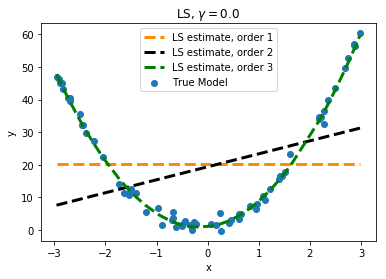

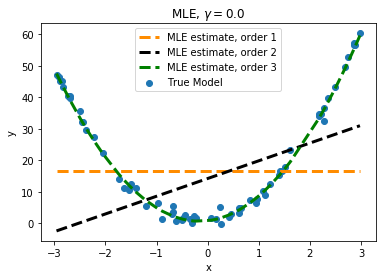

Best LS model: 3
Best ML model: 3

LS_model_3_dev_test: 734.8049194307748
ML_model_3_dev_test: 589.2879843273008


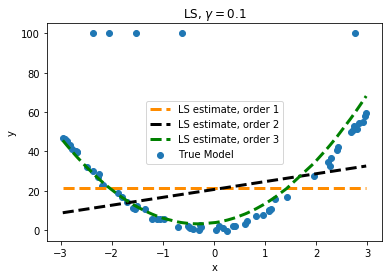

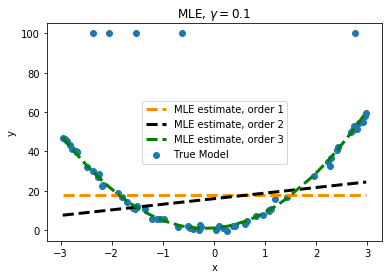

Best LS model: 3
Best ML model: 3

LS_model_3_dev_test: 1993.6089707211652
ML_model_3_dev_test: 1408.5745187699242


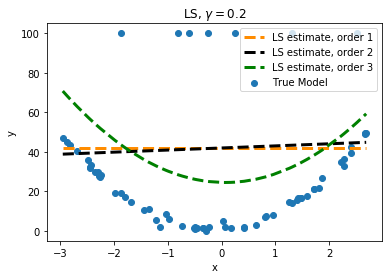

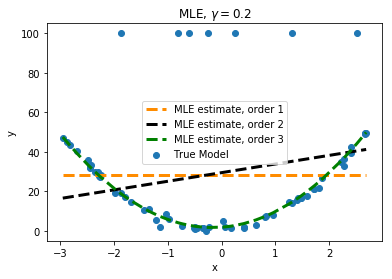

Best LS model: 3
Best ML model: 3

LS_model_3_dev_test: 2328.9540972678715
ML_model_3_dev_test: 1976.9246468955942


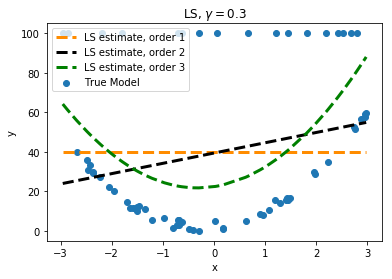

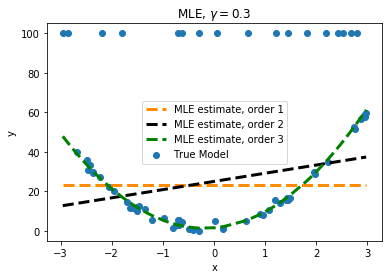

Best LS model: 3
Best ML model: 3

LS_model_3_dev_test: 2619.3273817767376
ML_model_3_dev_test: 2480.102405836108


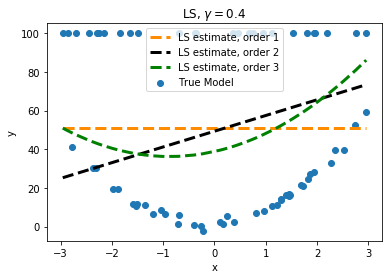

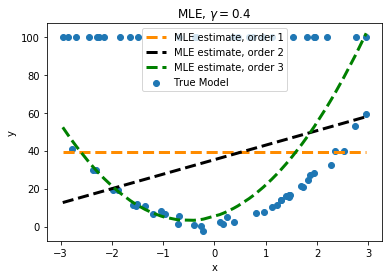

Best LS model: 3
Best ML model: 2

LS_model_3_dev_test: 2870.3544971134975
ML_model_2_dev_test: 2832.8402326683313


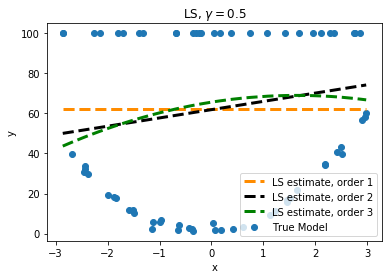

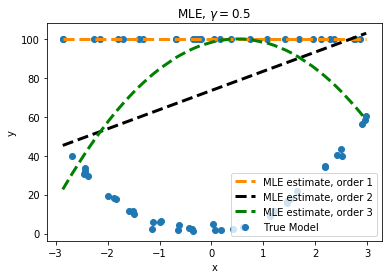

Best LS model: 3
Best ML model: 3

LS_model_3_dev_test: 2523.3400644080075
ML_model_3_dev_test: 3367.1691418086903


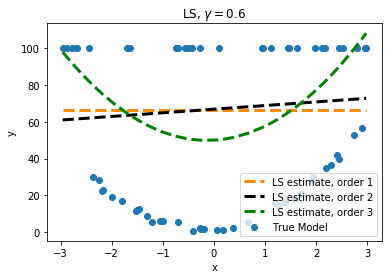

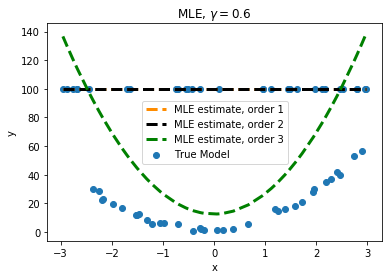

Best LS model: 1
Best ML model: 2

LS_model_1_dev_test: 2327.5563190403905
ML_model_2_dev_test: 1432.7088005136293


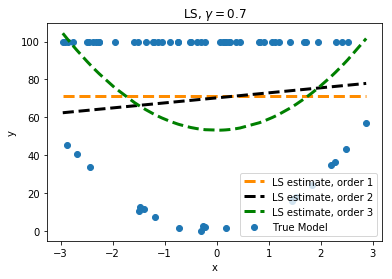

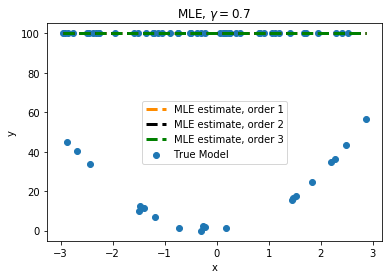

Best LS model: 1
Best ML model: 2

LS_model_1_dev_test: 1304.7811254946116
ML_model_2_dev_test: 837.2674240089123


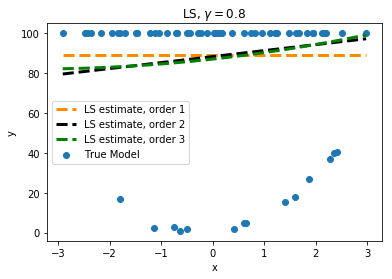

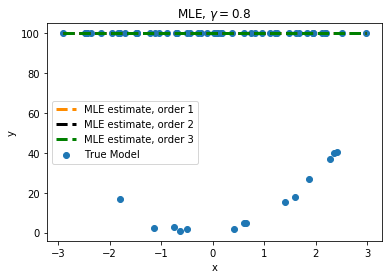

Best LS model: 1
Best ML model: 1

LS_model_1_dev_test: 898.2723426756395
ML_model_1_dev_test: 357.5410077065257


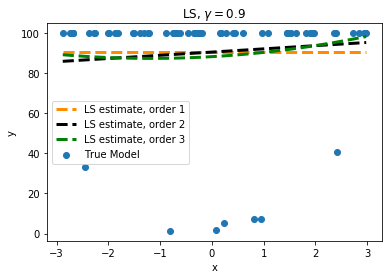

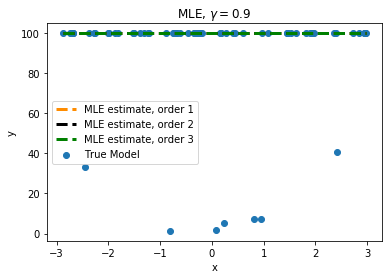

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,

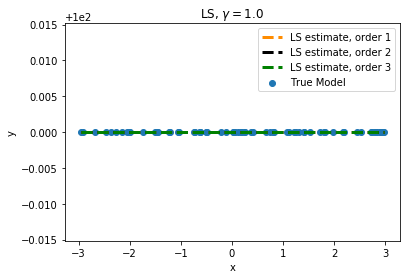

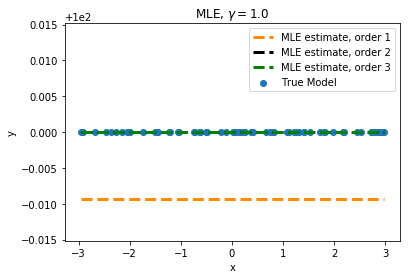

In [13]:
def plots4Gammas(magnitude, loc, N, gammaRange):
    range_low = -3
    range_high = 3
    u = np.sort(np.random.uniform(range_low,range_high,N))
    y_true = y_model(u)
    pdf = laplace.pdf
    alfa = 0
    normVariance = 1 # Input as the scale parameter in the normal distribution

    laplaceVariance = 1
    noiseNorm = magnitude * np.random.normal(loc, normVariance, int(alfa * N))

    noiseLaplace = magnitude * np.random.laplace(loc, laplaceVariance, int((1-alfa)*N))
    gammaArray = []
    bestLS = []
    bestMLE = []
    for i in range(gammaRange+1):
        gamma = i/gammaRange
        gammaArray.append(gamma)
        
        

        # Add noise to the generated data points - thus simulating measurement

        y = [0]*N
        for j in range(0, N):
            faulty = np.random.binomial(1, gamma)
            if faulty:
                
                y[j] = 100
            else:
                y[j] = y_true[j] + noiseLaplace[j]
        if gamma==1.0:
            print(y)
        training_set, test_set, validation_set = createNewSets(u,y)
        
        LS_params, LS_estimates, MLE_params, MLE_estimates= getModels(
            3, training_set[0], training_set[1])
        LS_opt_model, MLE_opt_model, LS_perf_test, MLE_perf_test = modelsPerf(
            3, LS_estimates, MLE_estimates, validation_set, test_set)
        bestLS.append(LS_perf_test)
        bestMLE.append(MLE_perf_test)
        
        plt.figure(num=2*i+1)
        plt.scatter(validation_set[0],validation_set[1] ,  label="True Model")
        plt.title("LS, $\gamma = $" f"{gamma}")

        plt.plot(validation_set[0], LS_estimates[0](validation_set[0]), color="darkorange" ,linestyle="--",  lw=3, label="LS estimate, order 1")
        plt.plot(validation_set[0], LS_estimates[1](validation_set[0]), color="black" ,linestyle="--",  lw=3, label="LS estimate, order 2")
        #plt.scatter(validation_set[0], LS_estimates[2](validation_set[0]))
        plt.plot(validation_set[0], LS_estimates[2](validation_set[0]), color="green", linestyle='--', lw=3, label="LS estimate, order 3")
        #plt.xlim(0, 10)
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")

        plt.figure(num=2*i+2)
        plt.scatter(validation_set[0],validation_set[1] ,  label="True Model")
        plt.title(r"MLE, $\gamma = $" f"{gamma}")

        plt.plot(validation_set[0], MLE_estimates[0](validation_set[0]), color="darkorange" ,linestyle="--",  lw=3, label="MLE estimate, order 1")
        plt.plot(validation_set[0], MLE_estimates[1](validation_set[0]), color="black" ,linestyle="--",  lw=3, label="MLE estimate, order 2")
        #plt.scatter(validation_set[0], LS_estimates[2](validation_set[0]))
        plt.plot(validation_set[0], MLE_estimates[2](validation_set[0]), color="green", linestyle='--', lw=3, label="MLE estimate, order 3")
        #plt.xlim(0, 10)
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
    return bestLS, bestMLE, gammaArray
bestLS, bestMLE, gammaArray = plots4Gammas(magnitude=1, loc=0, N=201, gammaRange=10)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


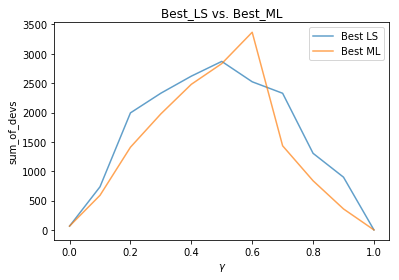

In [14]:
plt.plot(gammaArray[:], bestLS[:], alpha=0.7, label="Best LS")
plt.plot(gammaArray[:], bestMLE[:], alpha=0.7, label="Best ML")
plt.legend()
plt.xlabel(r"$\gamma$")
plt.ylabel("sum_of_devs")
plt.title("Best_LS vs. Best_ML")
print(gammaArray)